In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("data/dataset.csv")

In [3]:
data.rename(
    columns={
        "id_producto": "order_id",
        "id_partner": "partner_id",
        "fecha": "date",
        "exito": "status_BO",
        "marca": "partner",
        "franquicia": "partner_or_franchise",
        "motivo": "reason_text",
        "codigo_error": "globalCode",
        "valor": "declared_value"
    }
, inplace=True)

## Setup 

### Fechas

In [4]:
current_date = datetime.now()
current_month = current_date.month
current_day = current_date.day
current_year = current_date.year

# last_week_start = current_date - timedelta(days=7 * (current_week_number - 1), weeks=1)
current_week_start = current_date - timedelta(days=current_date.weekday())
last_week_start = current_week_start - timedelta(days=7)
last_week_end = last_week_start + timedelta(days=6)

# START_DATE = last_week_start.strftime("%Y-%m-%d")
START_DATE = "2024-01-01"
END_DATE = current_date.strftime("%Y-%m-%d") # last_week_end.strftime("%Y-%m-%d")
DATE_COL = "date"

In [5]:
print(f"{START_DATE = }, {END_DATE = }")

START_DATE = '2024-01-01', END_DATE = '2024-10-01'


## Formatear Dataset

### Filtrar rango de fecha

In [6]:
data[DATE_COL] = pd.to_datetime(data[DATE_COL])
df = data[(data[DATE_COL] >= START_DATE) & (data[DATE_COL] <= END_DATE)]
date_range = pd.date_range(start=df[DATE_COL].min(), end=df[DATE_COL].max())

In [19]:
df["week"] = data["date"].dt.to_period("W").apply(lambda r: r.start_time)
week_range = pd.date_range(start=df["week"].min(), end=df["week"].max(), freq="W-MON")

In [8]:
rejected_pct_full = df[df['status_BO'] == 'REJECTED'].groupby('date').size().reindex(date_range, fill_value=0) / \
                    df.groupby('date').size().reindex(date_range, fill_value=0) * 100
rejected_pct_full

2024-01-01    4.509284
2024-01-02    6.497175
2024-01-03    4.092072
2024-01-04    5.120482
2024-01-05    3.361345
                ...   
2024-09-26    7.031250
2024-09-27    4.945055
2024-09-28    5.208333
2024-09-29    5.047319
2024-09-30    5.913978
Freq: D, Length: 274, dtype: float64

### Crear datasets por criterios

## Analisis de contraste

In [9]:
def pick_df_variables(columns: list[str]) -> dict:
    picks = {}
    for col in columns:
        options = df[col].unique()
        picked = np.random.choice(options)
        
        picks[col] = picked
    return picks

picks = pick_df_variables(["partner_or_franchise", "globalCode"])

In [11]:
df["globalCode"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: globalCode, Length: 100000, dtype: object

In [75]:
df2 = df[df["partner_or_franchise"] != picks["partner_or_franchise"]]
df_picked_franchise = df[df["partner_or_franchise"] == picks["partner_or_franchise"]]

dfs = [df, df2, df_picked_franchise]

def get_percent(dfs: list[pd.DataFrame], cat_col: str, dat_col: str = "week") -> list[pd.DataFrame]:
    datasets = []
    for df in dfs:
        total_w = df.groupby([dat_col]).size().reindex(week_range, fill_value=0)
        total_condition_w = (
            df.groupby([dat_col, cat_col]).size().unstack(fill_value=0)
        )
        percent_w = total_condition_w.div(total_w, axis=0).reset_index()
        datasets.append(percent_w)

    return datasets

In [95]:
def plot_columns_from_datasets(
    dfs: list[pd.DataFrame], col_name: str | list[str], col_dat: str
) -> None:
    """
    Grafica una columna común en varios DataFrames en una sola figura.

    Parameters:
    dfs (list of pd.DataFrame): Lista de DataFrames.
    column_name (str): Nombre de la columna a graficar.
    x_col (str): Nombre de la columna que representa el eje X (por ejemplo, date o week).
    """
    if isinstance(col_name, list):
        col_name = [col_name]

    n_categories = len(col_name)

    sns.set_style("darkgrid")
    fig, axes = plt.subplots(
        n_categories, 1, figsize=(10, 5 * n_categories), sharex=True
    )

    if n_categories == 1:
        axes = [axes]

    for idx, col in enumerate(col_name):
        ax = axes[idx]
        ax.set_title(f"{col}")
        ax.set_xlabel(col_dat)
        ax.set_ylabel("")
        
        for dataset_idx, df in enumerate(dfs):
            if col in df.col_name:
                ax.plot(df.index, df[col], label=f"Dataset {dataset_idx + 1}")    
        ax.legend()

    plt.tight_layout()
    plt.show()

AttributeError: 'DataFrame' object has no attribute 'col_name'

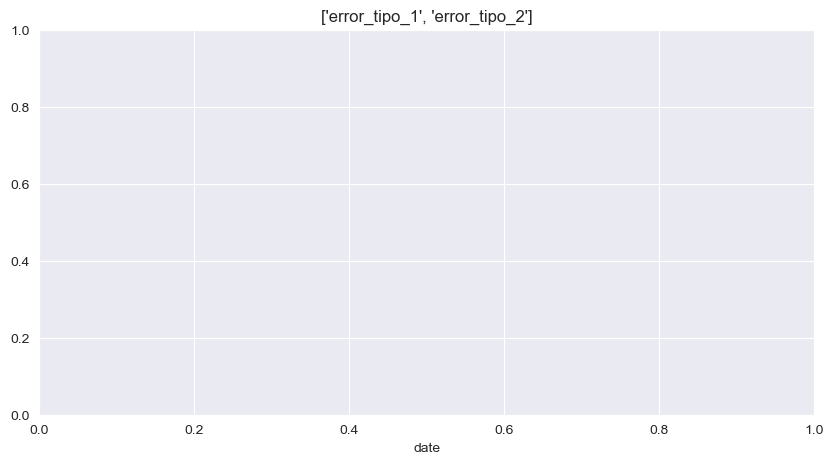

In [96]:
reasons = get_percent(dfs, "globalCode")
plot_columns_from_datasets(reasons, ["error_tipo_1", "error_tipo_2"], "date")

list[['sdlfgj']]

### Crear datasets

<Axes: xlabel='week'>

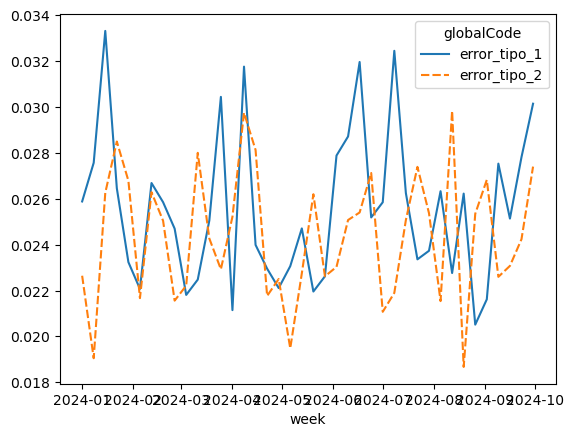

In [49]:
percent_error = errors_orders_w.div(total_orders_w, axis=0)

sns.lineplot(percent_error)

In [31]:
# Solo REJECTED
rejected_df = df[df["status_BO"] == "REJECTED"]
rejected_df2 = df2[df2["status_BO"] == "REJECTED"]



### Graficar

<Axes: xlabel='monto', ylabel='Count'>

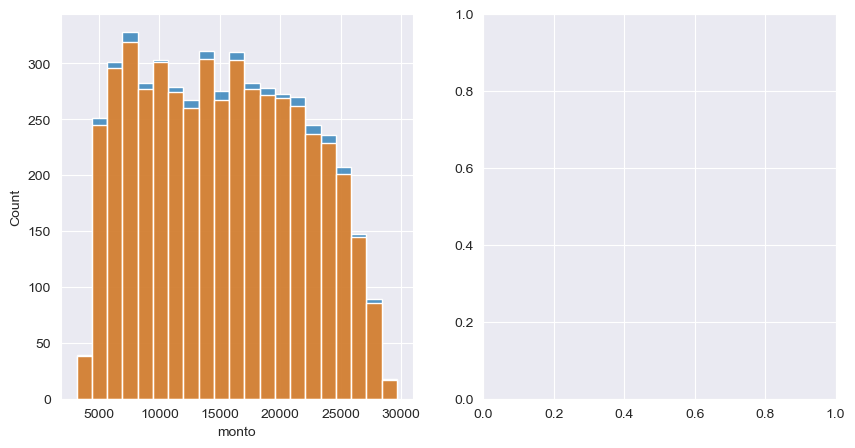

In [48]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(rejected_df["monto"], ax=ax[0])
sns.histplot(rejected_df2["monto"], ax=ax[0])


## Treemap

### Formatear datos

### Graficar

TypeError: treemap() got an unexpected keyword argument 'text'

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,651.056899,901.036960,930.576735,881.313057,626.153034,398.365768,546.939549,363.839115,312.669785,787.898632,...,944.685359,800.0,396.317941,848.445463,607.466844,122.241250,697.586888,894.649001,974.780238,989.660717
1,520.066889,890.528094,58.245933,68.148910,790.760709,58.031596,675.988895,279.530378,531.402900,894.549108,...,503.853560,800.0,805.584123,871.461097,423.851859,757.033063,513.481451,179.611106,641.656162,583.478162
2,690.746545,641.385747,979.589120,933.652545,631.990265,827.579365,994.566401,37.095773,74.643905,783.051044,...,688.451353,800.0,270.861526,86.540056,812.021650,632.048483,289.076268,670.142966,309.339644,32.251729
3,196.815348,30.111757,386.328724,827.175129,268.928762,252.033595,887.515048,807.320376,910.669936,120.790221,...,29.290955,800.0,970.011532,906.321592,878.081578,121.530637,149.402591,691.330404,587.936655,19.316337
4,912.227040,341.855535,269.710068,403.883135,935.086193,122.939236,124.805007,665.786943,972.263952,327.370934,...,82.248999,800.0,524.952022,236.304408,832.802007,553.769572,188.595728,823.683141,400.171785,342.470872
5,669.753228,856.427039,354.336913,627.838747,745.336069,984.812100,968.235864,181.795440,749.059766,355.159303,...,124.031270,800.0,114.822915,232.458325,15.532087,818.032192,670.565450,418.158117,183.881915,726.604659
6,59.759782,263.848804,713.390900,626.414092,681.905118,622.877063,119.638724,349.292250,77.546608,293.853476,...,292.630498,800.0,631.813508,858.928612,671.519923,812.028015,780.698853,313.331466,328.791626,250.720471
7,804.298832,126.132169,123.983328,280.569759,297.095190,62.058512,885.651831,945.749817,559.238732,98.815197,...,656.113120,800.0,199.598465,870.009922,779.139376,706.094776,726.241705,90.405453,905.008882,828.228629
8,587.240990,979.518587,144.170902,820.851601,39.543640,48.903909,378.058540,742.644304,108.021432,745.513342,...,846.077633,800.0,129.296317,441.616899,890.430498,815.513631,302.236147,500.874505,95.645283,822.120356
9,909.354651,276.291542,647.503831,153.743811,393.393798,763.896145,537.898693,480.730193,698.660991,912.190069,...,961.685918,800.0,105.587360,636.084742,587.175191,352.313314,495.017303,164.208913,418.519506,639.178259


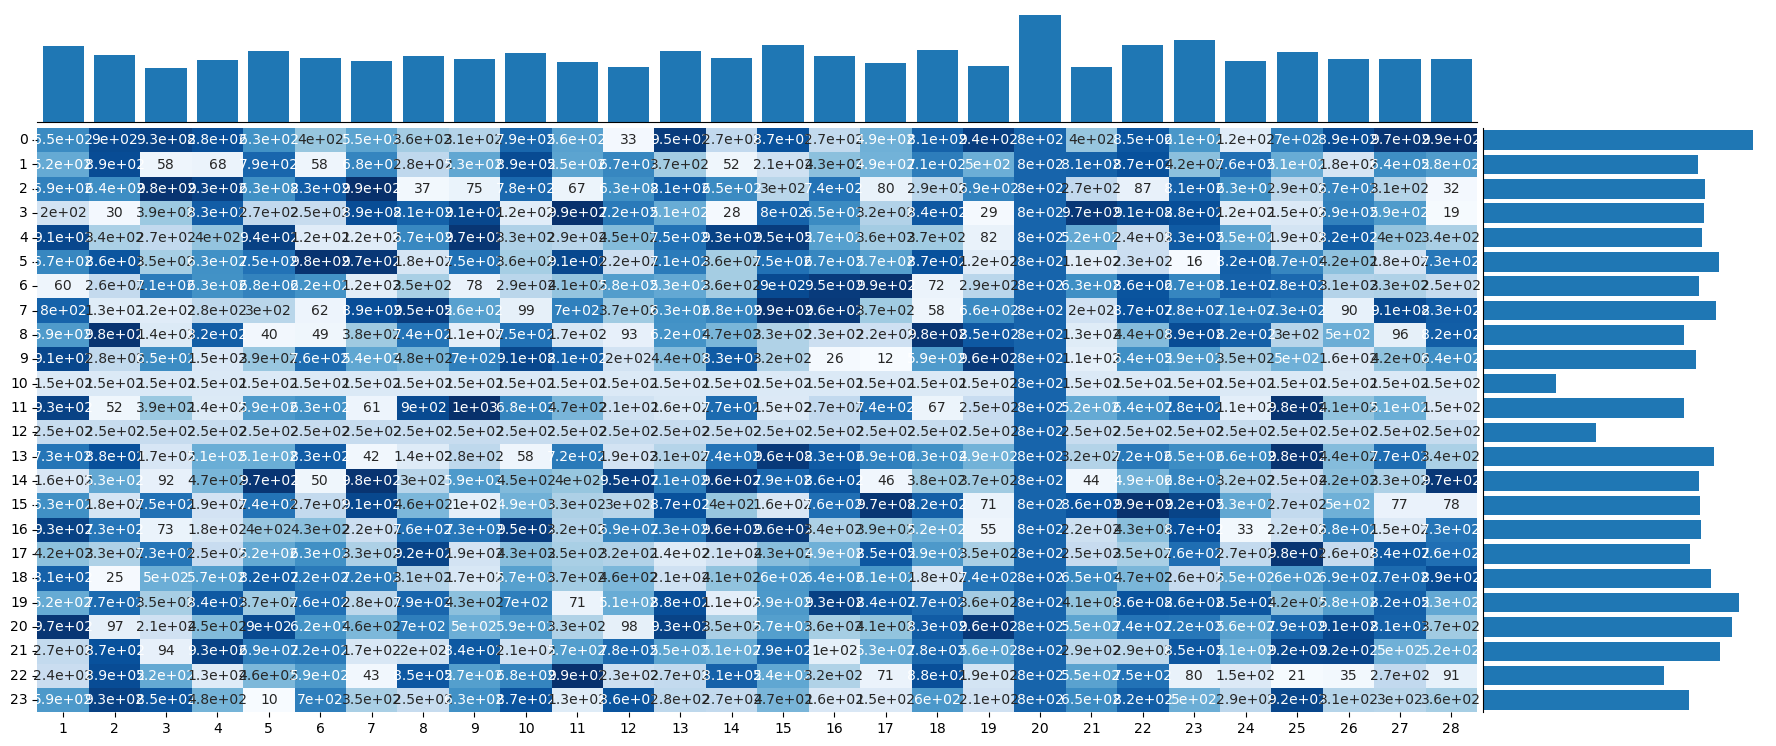

In [20]:

g = sns.jointplot(data=df, x='day', y='hour', kind='hist', bins=(D, H))
g.ax_marg_y.cla()
g.ax_marg_x.cla()
sns.heatmap(data=pd.DataFrame(test), ax=g.ax_joint, cbar=False, cmap='Blues', annot=True)

g.ax_marg_y.barh(np.arange(0.5, H), df.groupby(['hour'])['Cost Dif.'].sum().to_numpy())
g.ax_marg_x.bar(np.arange(0.5, D), df.groupby(['day'])['Cost Dif.'].sum().to_numpy())

g.ax_joint.set_xticks(np.arange(0.5, D))
g.ax_joint.set_xticklabels(range(1, D + 1), rotation=0)
g.ax_joint.set_yticks(np.arange(0.5, H))
g.ax_joint.set_yticklabels(range(H), rotation=0)

# remove ticks between heatmao and histograms
g.ax_marg_x.tick_params(axis='x', bottom=False, labelbottom=False)
g.ax_marg_y.tick_params(axis='y', left=False, labelleft=False)
# remove ticks showing the heights of the histograms
g.ax_marg_x.tick_params(axis='y', left=False, labelleft=False)
g.ax_marg_y.tick_params(axis='x', bottom=False, labelbottom=False)

g.fig.set_size_inches(20, 8)  # jointplot creates its own figure, the size can only be changed afterwards
# g.fig.subplots_adjust(hspace=0.3) # optionally more space for the tick labels
g.fig.subplots_adjust(hspace=0.05, wspace=0.02)  # less spaced needed when there are no tick labels
plt.show()